In [6]:
import sklearn
import numpy as np
import sklearn.cluster
import sklearn.naive_bayes
import sklearn.datasets
import matplotlib.pyplot as plt
seed = 0
np.random.seed(seed)

In [7]:
class CustomMultinomialNB:
    def fit(self,X,y):
        pass
    def predict_proba(self,X):
        pass
# CustomMultinomialNB().fit(X,y)

(423176,) (423176, 2)


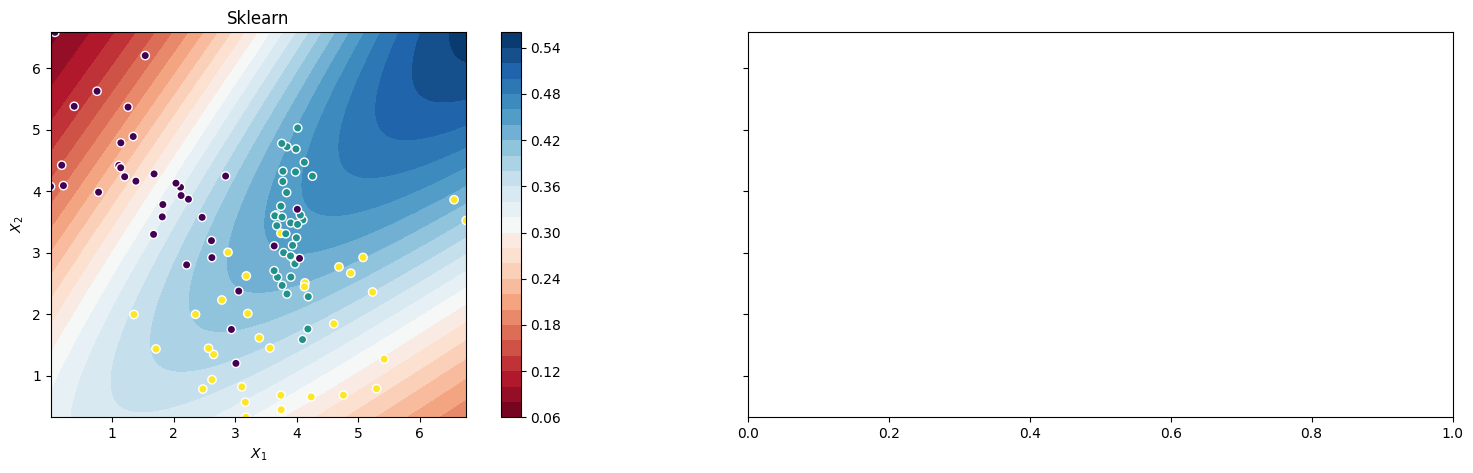

In [20]:
n_classes = 3
X, y = sklearn.datasets.make_classification(
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=n_classes,
    n_clusters_per_class=1,
    random_state=0,
)
X += -X.min() + .001
ylim = X[:, 1].min(), X[:, 1].max()
xlim = X[:, 0].min(), X[:, 0].max()
xx, yy = np.mgrid[xlim[0]:xlim[1]:.01, ylim[0]:ylim[1]:.01]
grid = np.stack((xx.ravel(),yy.ravel()),axis=1)

def draw(probs, f, ax, title):
    contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu")
    ax_c = f.colorbar(contour)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="white")
    ax.set(aspect="equal", xlim=xlim, ylim=ylim,
           xlabel="$X_1$", ylabel="$X_2$")
    ax.set_title(title)


model = sklearn.naive_bayes.MultinomialNB().fit(X, y)

probs1 = model.predict_proba(grid)[:, 1].reshape(xx.shape)
# probs2 = custom.predict_proba(grid)[:, 1].reshape(xx.shape)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
draw(probs1, fig, ax1, "Sklearn")
# draw(probs2, fig,ax2,"Custom")